## Contour plots of tracer concentration on shelf bottom for several initial profiles

Map hcw on shelf by looking at bottom cells and multiplying their concentration by their area.


The algorithm:

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

import matplotlib as mpl

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

Ptracer='/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/ptracersGlob.nc'
PtracerOut = Dataset(Ptracer)

PtracerNoC='/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/ptracersGlob.nc'
PtracerNoCOut = Dataset(PtracerNoC)


In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

In [7]:
Tr01 = rout.getField(Ptracer,'Tr01') # 
Tr02 = rout.getField(Ptracer,'Tr02') # 
Tr03 = rout.getField(Ptracer,'Tr03') # 

In [8]:
Tr04 = rout.getField(Ptracer,'Tr04') # 
Tr05 = rout.getField(Ptracer,'Tr05') # 
Tr06 = rout.getField(Ptracer,'Tr06') # 

In [9]:
Tr07 = rout.getField(Ptracer,'Tr07') # 
Tr08 = rout.getField(Ptracer,'Tr08') # 

In [10]:
#Tr01noc = rout.getField(PtracerNoC,'Tr01') # 
#Tr02noc = rout.getField(PtracerNoC,'Tr02') # 
#Tr03noc = rout.getField(PtracerNoC,'Tr03') # 

In [11]:
#Tr04noc = rout.getField(PtracerNoC,'Tr04') # 
#Tr05noc = rout.getField(PtracerNoC,'Tr05') # 
#Tr06noc = rout.getField(PtracerNoC,'Tr06') # 

In [12]:
#Tr07noc = rout.getField(PtracerNoC,'Tr07') # 
#Tr08noc = rout.getField(PtracerNoC,'Tr08') # 

In [13]:
def ConcArea(Tr, hfac, ra):
    '''Tr: tracer field (nt,nz,ny,nx)
       hfac: fraction of open cell at center (nz,ny,nx)
       ra: array of cell horizontal areas (ny,nx)
       RETURNS:
       ConcArea = concentration at cell closest to bottom times its area (nt,ny,nx)
       Conc = cocnetration near bottom (nt,ny,nx)'''
    
    ConcArea = np.empty((19,360,360))
    Conc = np.empty((19,360,360))
    Area = np.empty((360,360))
    BottomInd = np.argmax(hfac[::-1,:,:]>0.0,axis=0) # start looking for first no-land cell from the bottom up.
    BottomInd = np.ones(np.shape(BottomInd))*89 - BottomInd # Get index of unreversed z axis

    print(np.shape(BottomInd))
    for tt in range(19):
        #print(tt)
        for i in range(360):
            for j in range(360):
                TrBottom = Tr[tt,BottomInd[i,j],i,j]
                ConcArea[tt,i,j] = TrBottom*ra[i,j]
                Conc[tt,i,j] = TrBottom
                Area[i,j] = ra[i,j]
    
    print(np.shape(ConcArea))

    #ConcAreaMasked = np.ma.masked_values(ConcDepths,-2.5)
    #ConcDepths[np.where(np.ma.getmask(ConcDepthsMasked)==True)] = np.nan
    return (ConcArea,Conc, Area)

In [14]:
ConcArea1,Conc1,Area1=ConcArea(Tr01, hFacCNoC, rANoC)

(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


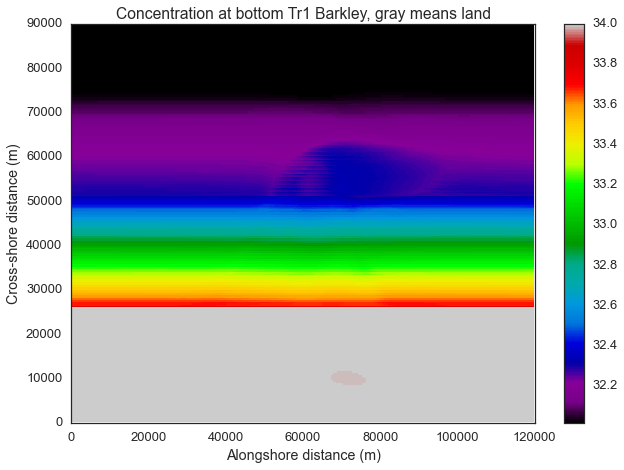

In [16]:
sns.set_context('talk',font_scale=1.0)
plt.pcolor(xc[1,:],yc[:,1],Conc1[10,:,:],cmap='spectral')
cbar = plt.colorbar()
plt.title('Concentration at bottom Tr1 Barkley, gray means land')
plt.ylabel('Cross-shore distance (m)')
plt.xlabel('Alongshore distance (m)')

In [17]:
ConcArea2, Conc2, Area2 = ConcArea(Tr02, hFacCNoC, rANoC)
ConcArea3, Conc3, Area3 = ConcArea(Tr03, hFacCNoC, rANoC)
ConcArea4, Conc4, Area4 = ConcArea(Tr04, hFacCNoC, rANoC)
ConcArea5, Conc5, Area5 = ConcArea(Tr05, hFacCNoC, rANoC)
ConcArea6, Conc6, Area6 = ConcArea(Tr06, hFacCNoC, rANoC)
ConcArea7, Conc7, Area7 = ConcArea(Tr07, hFacCNoC, rANoC)
ConcArea8, Conc8, Area8 = ConcArea(Tr08, hFacCNoC, rANoC)

(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [18]:
#ConcArea2noc, Conc2noc, Area2noc = ConcArea(Tr02noc, hFacCNoC, rANoC)
#ConcArea3noc, Conc3noc, Area3noc = ConcArea(Tr03noc, hFacCNoC, rANoC)
#ConcArea4noc, Conc4noc, Area4noc = ConcArea(Tr04noc, hFacCNoC, rANoC)
#ConcArea5noc, Conc5noc, Area5noc = ConcArea(Tr05noc, hFacCNoC, rANoC)
#ConcArea6noc, Conc6noc, Area6noc = ConcArea(Tr06noc, hFacCNoC, rANoC)
#ConcArea7noc, Conc7noc, Area7noc = ConcArea(Tr07noc, hFacCNoC, rANoC)
#ConcArea8noc, Conc8noc, Area8noc = ConcArea(Tr08noc, hFacCNoC, rANoC)

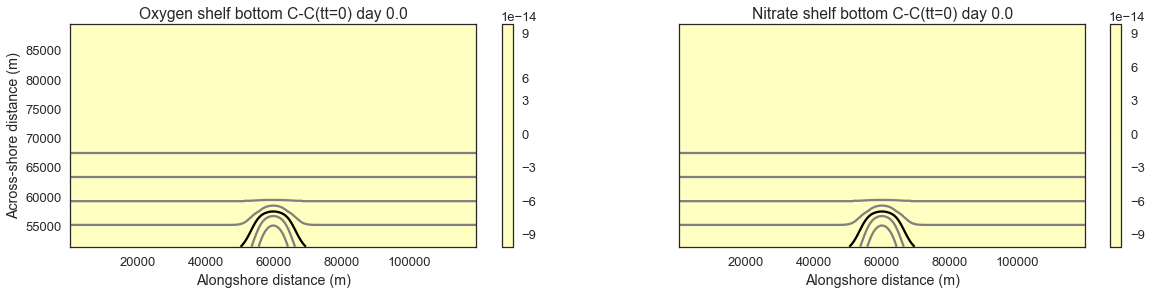

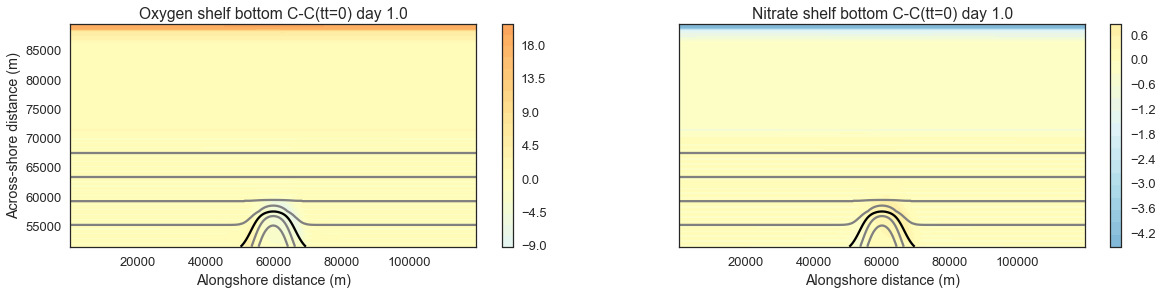

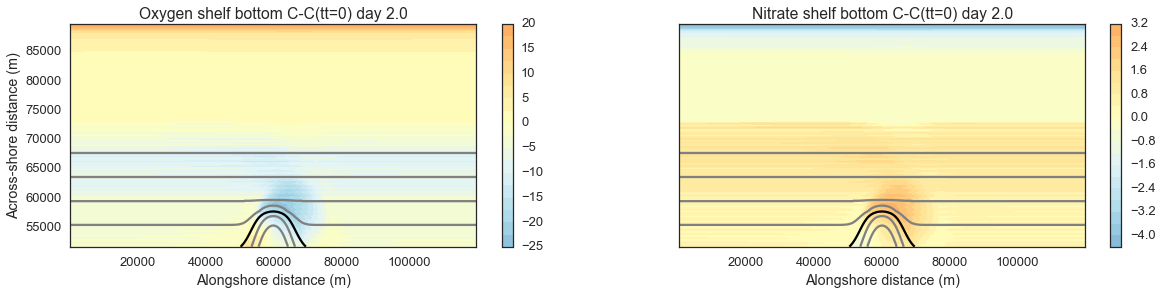

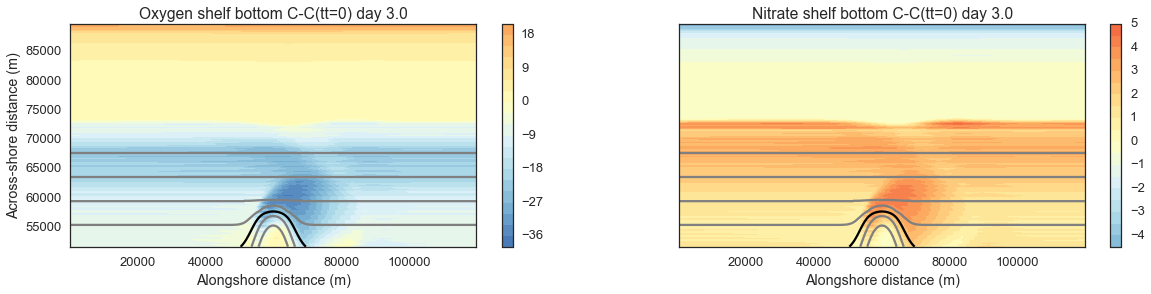

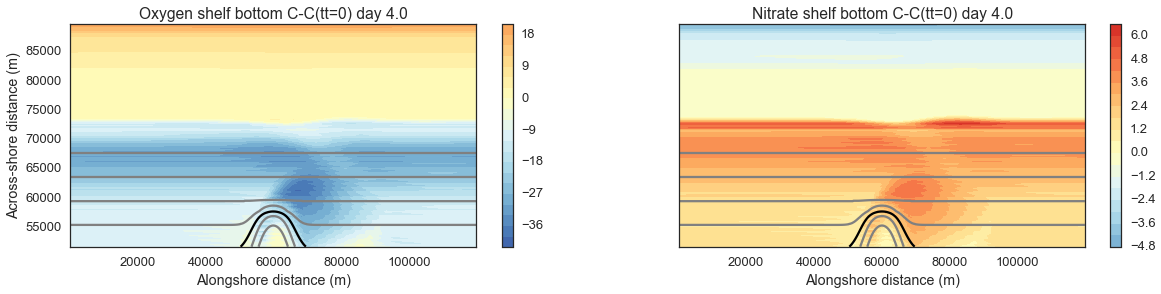

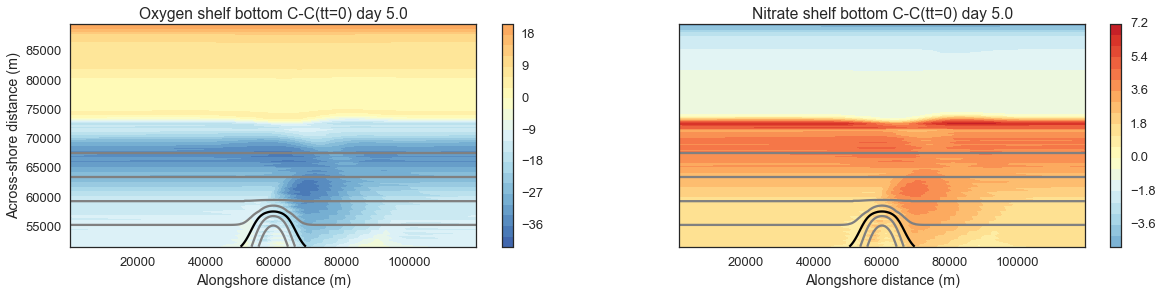

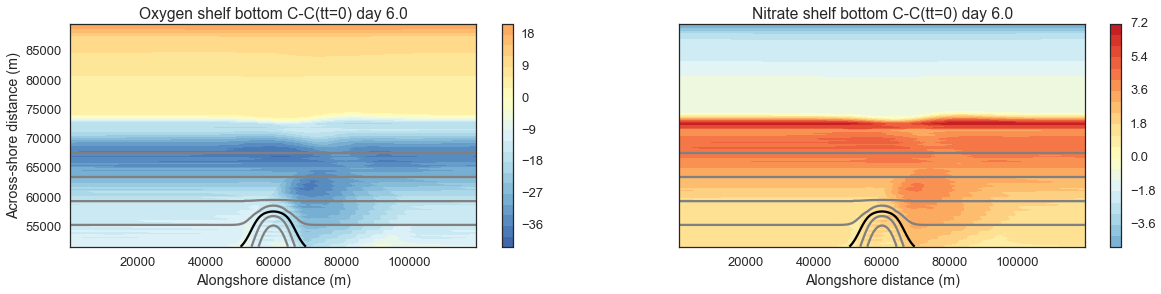

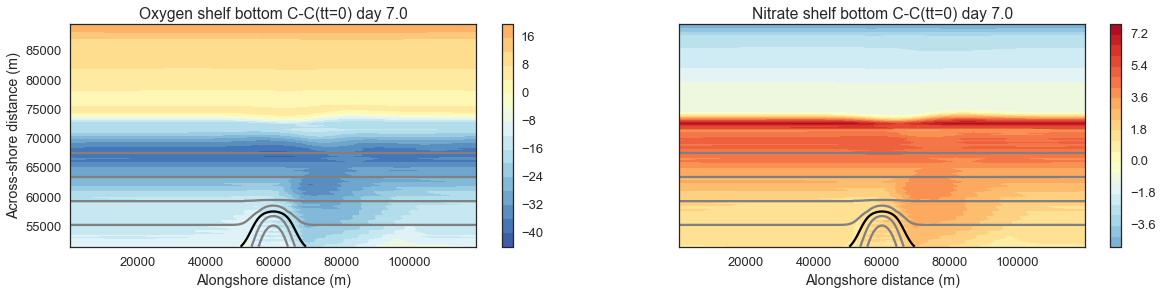

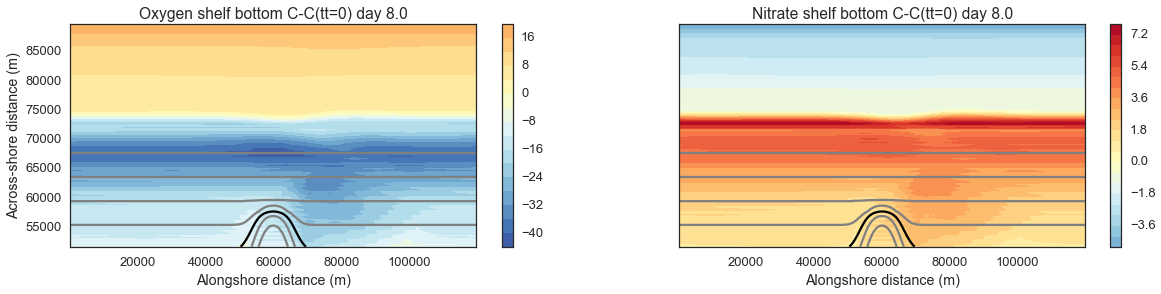

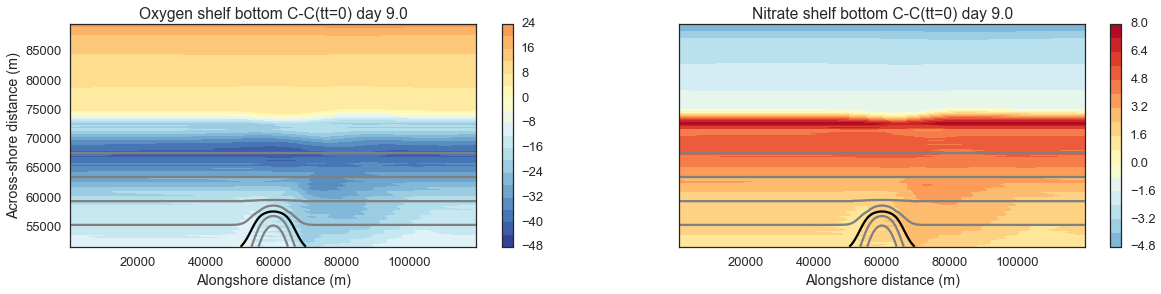

In [20]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    
    fig,((ax1),(ax2)) = plt.subplots(1, 2, figsize=(20, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:,:],yc[227:,:],Conc3[tt,227:,:]-Conc3[0,227:,:],20,
                       vmin = -48.0, vmax = 48.0, cmap='RdYlBu_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    #cb.set_label('')
    cset = ax1.contour(xc[227:,:],yc[227:,:],-bathy[227:,:],[-300,-200, rc[30],-125,-100,-75,-50],
                       colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Oxygen shelf bottom C-C(tt=0) day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    iso2 = ax2.contourf(xc[227:,:],yc[227:,:],Conc4[tt,227:,:]-Conc4[0,227:,:],20,
                        vmin = -8.0, vmax = 8.0 , cmap='RdYlBu_r')
    cb2 = plt.colorbar(iso2, shrink=1,ax=ax2)
    #cb2.set_label('m')
    cset = ax2.contour(xc[227:,:],yc[227:,:],-bathy[227:,:],[-300,-200, rc[30],-125,-100,-75,-50],
                       colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Nitrate shelf bottom C-C(tt=0) day %0.1f ' %(tt/2.0))
    #ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    plt.tight_layout
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

Note that I used the flat shelf mask to find the "shelf bottom". This means that the region over the canyon is the concentration*area over the lid of the canyon.

(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


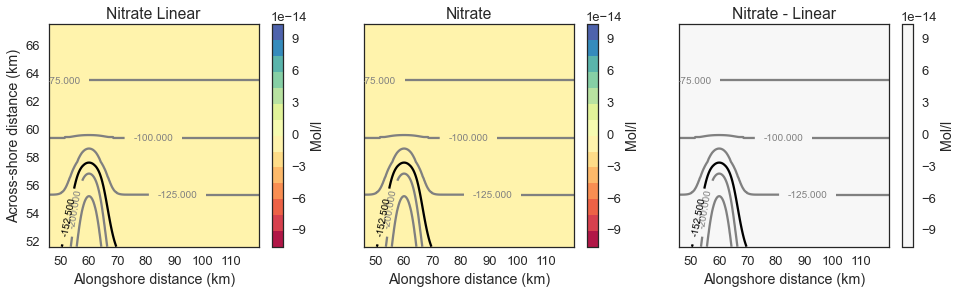

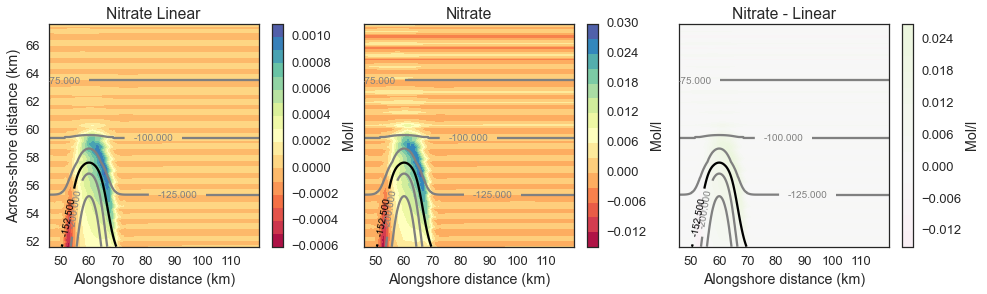

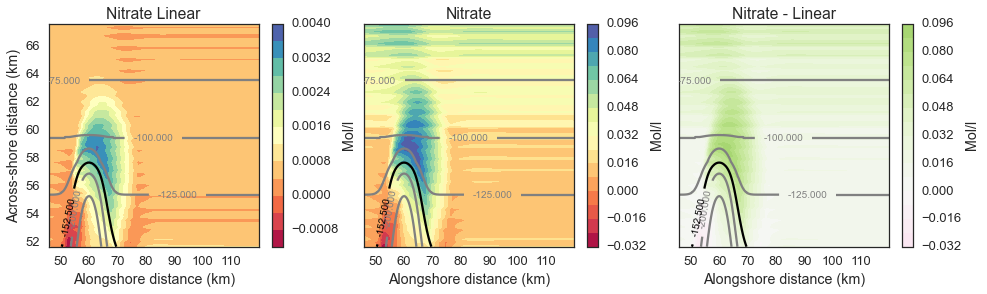

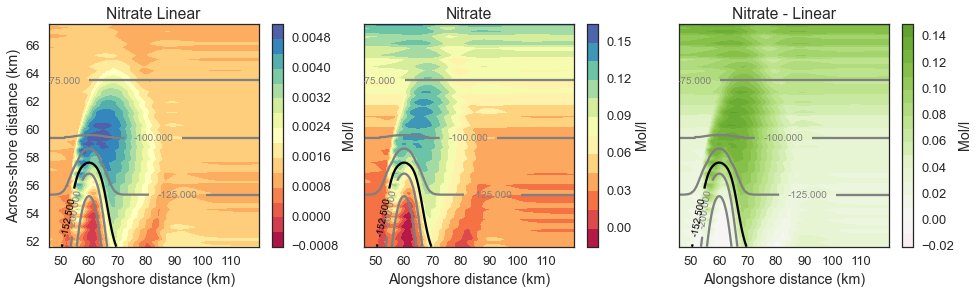

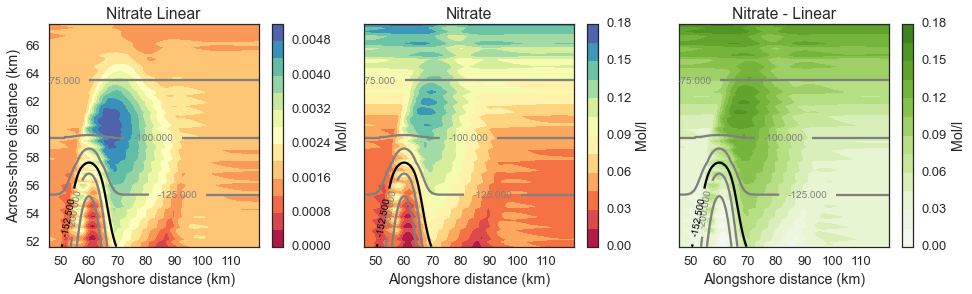

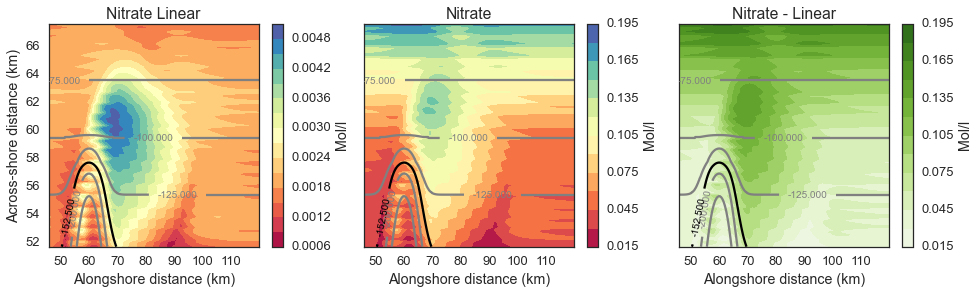

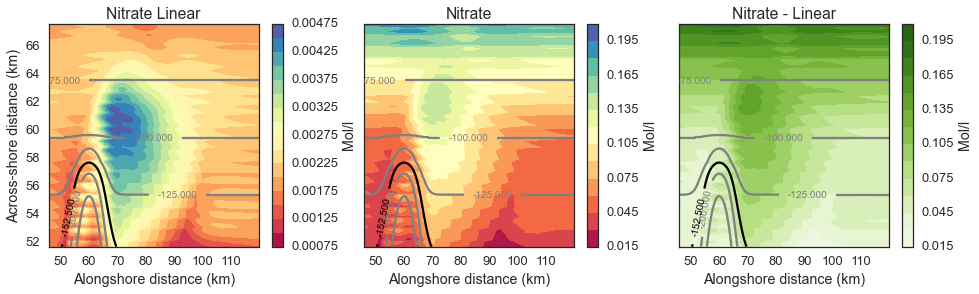

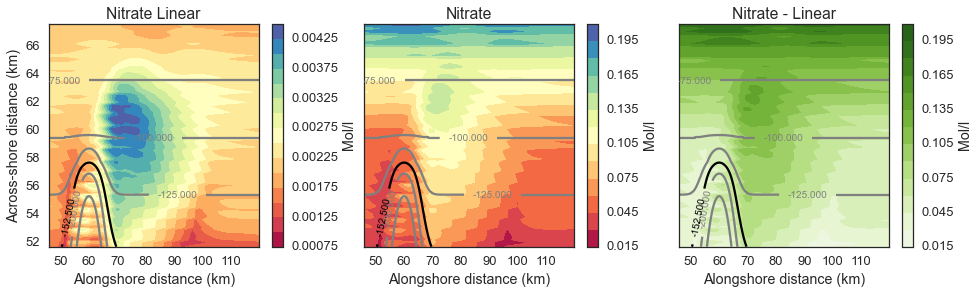

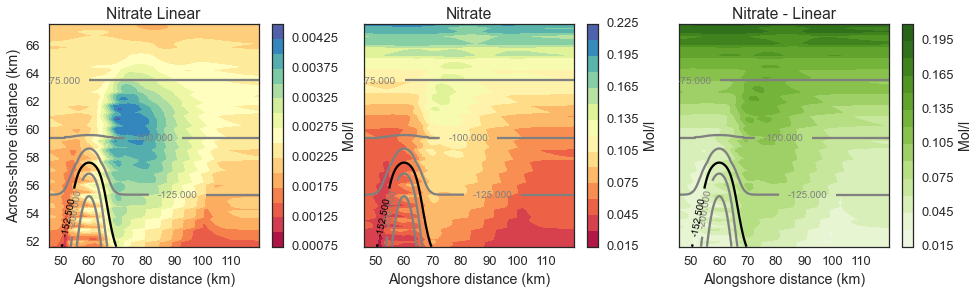

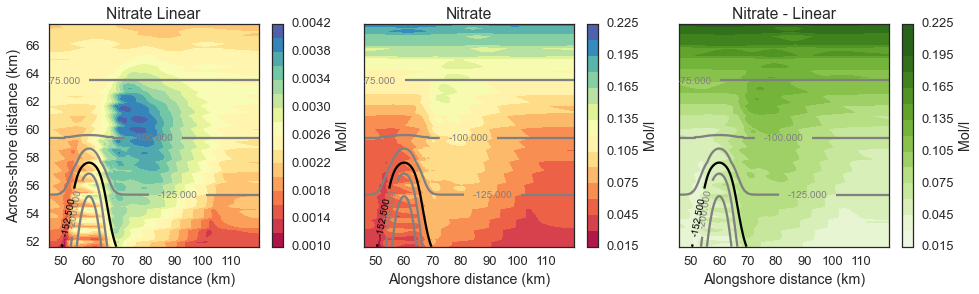

In [32]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(16, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                       (Conc1[tt,227:300,100:]-Conc1[0,227:300,100:])/Conc1[0,227:300,100:],15,
                       cmap='Spectral')
    
    cax,kw = mpl.colorbar.make_axes([ax1],location='right',shrink=1)
    cb = plt.colorbar(iso, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax1.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],[-300,-200, rc[30],-125,-100,-75,-50],
                       colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')
    ax1.clabel(cset, inline=1, fontsize=10)
    
    ax1.set_aspect('auto')
    ax1.set_title('Nitrate Linear')
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso2 = ax2.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc4[tt,227:300,100:]-Conc4[0,227:300,100:])/Conc4[0,227:300,100:],15,cmap='Spectral')
    cax,kw = mpl.colorbar.make_axes([ax2],location='right',shrink=1)
    cb = plt.colorbar(iso2, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax2.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50], colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax2.clabel(cset, inline=1, fontsize=10)
    
    ax2.set_aspect('auto')
    ax2.set_title('Nitrate')
    ax2.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso3 = ax3.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        ((Conc4[tt,227:300,100:]/Conc4[0,227:300,100:])-Conc1[tt,227:300,100:]/Conc1[0,227:300,100:]),
                        15, vmin = -0.2, vmax = 0.2, cmap='PiYG')
    cax,kw = mpl.colorbar.make_axes([ax3],location='right',shrink=1)
    cb = plt.colorbar(iso3, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax3.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax3.clabel(cset, inline=1, fontsize=10)
    
    ax3.set_aspect('auto')
    ax3.set_title('Nitrate - Linear ' %(tt/2.0))
    ax3.set_xlabel('Alongshore distance (km)')
    
    #plt.tight_layout()
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

0
2
4
6
8
10
12
14
16
18


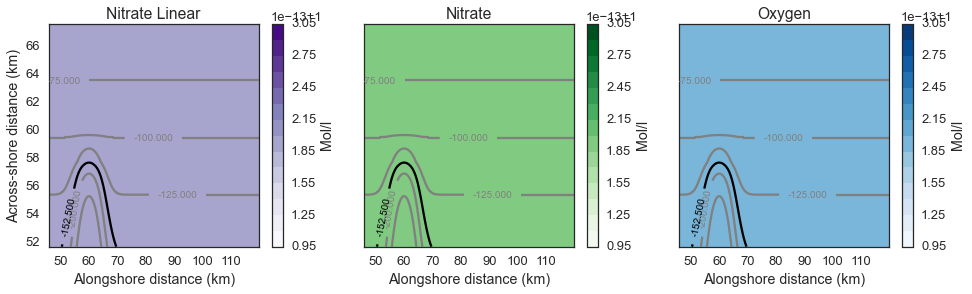

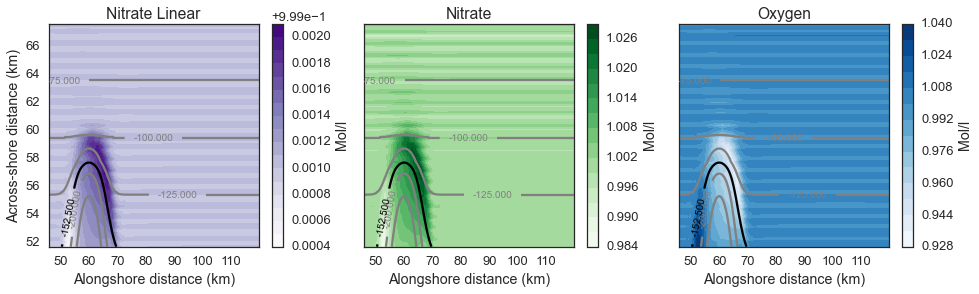

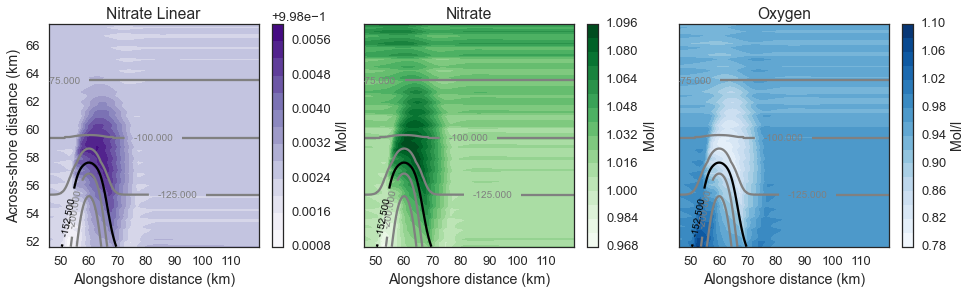

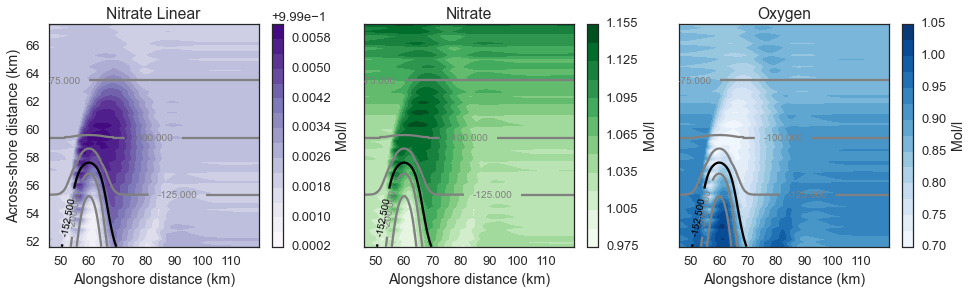

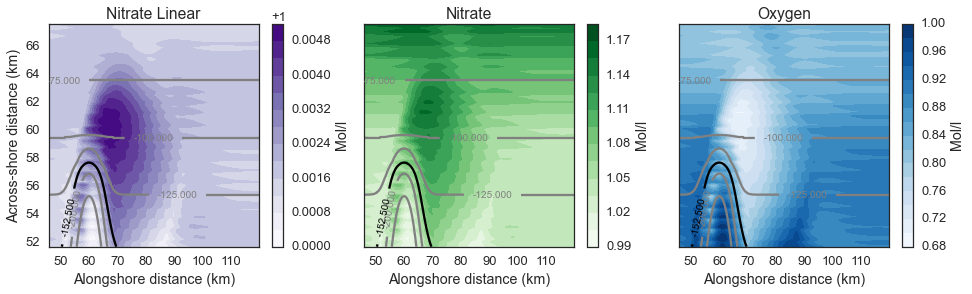

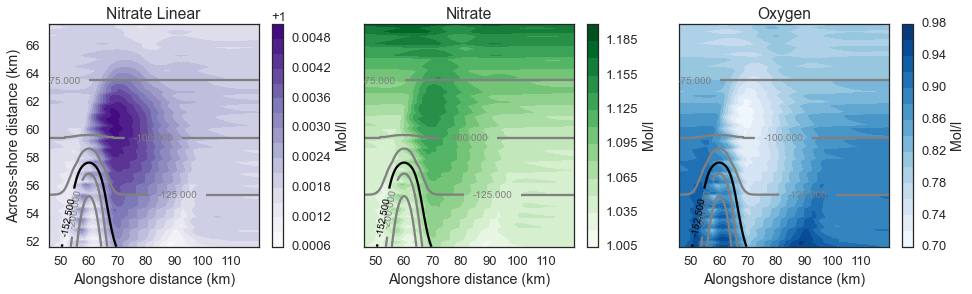

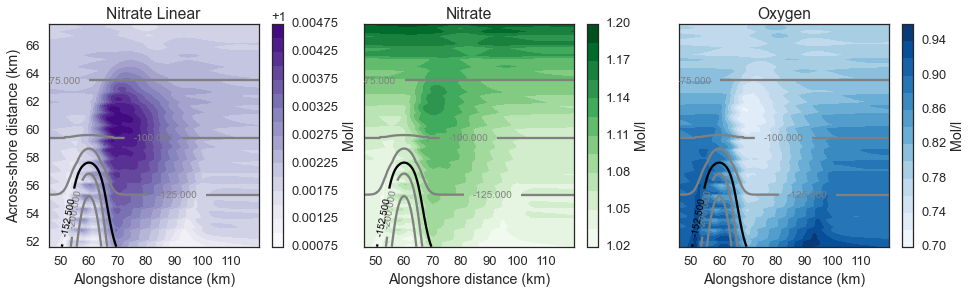

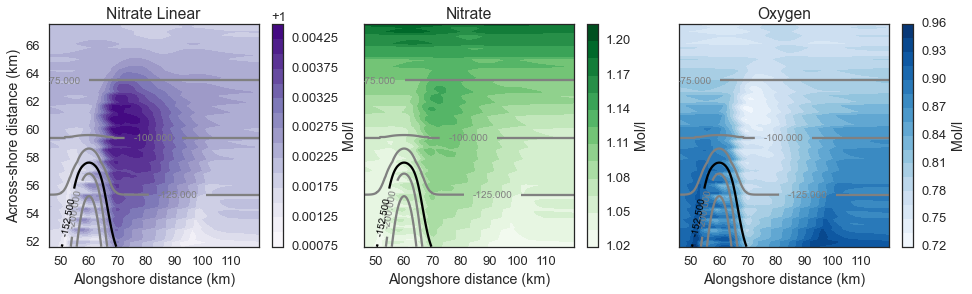

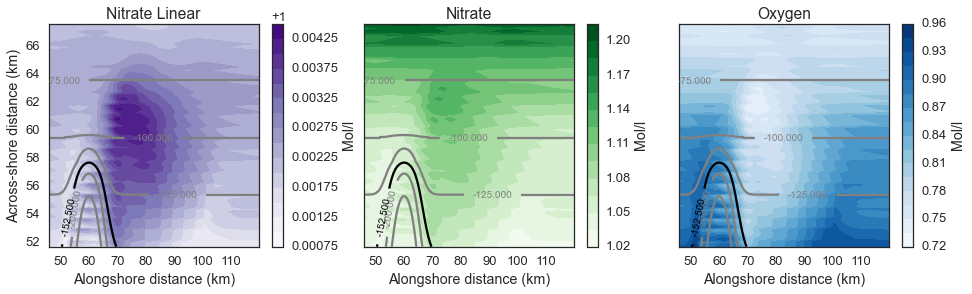

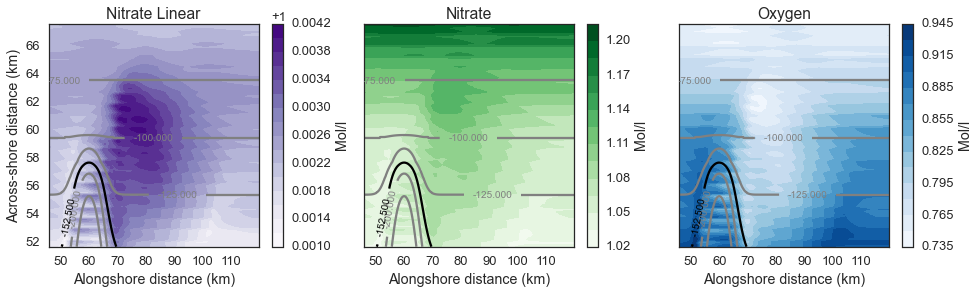

In [45]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    print(tt)
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(16, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                       (Conc1[tt,227:300,100:])/Conc1[0,227:300,100:],15,
                       cmap='Purples')
    
    cax,kw = mpl.colorbar.make_axes([ax1],location='right',shrink=1)
    cb = plt.colorbar(iso, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax1.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],[-300,-200, rc[30],-125,-100,-75,-50],
                       colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')
    ax1.clabel(cset, inline=1, fontsize=10)
    
    ax1.set_aspect('auto')
    ax1.set_title('Nitrate Linear')
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso2 = ax2.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc4[tt,227:300,100:])/Conc4[0,227:300,100:],15,cmap='Greens')
    cax,kw = mpl.colorbar.make_axes([ax2],location='right',shrink=1)
    cb = plt.colorbar(iso2, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax2.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50], colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax2.clabel(cset, inline=1, fontsize=10)
    
    ax2.set_aspect('auto')
    ax2.set_title('Nitrate')
    ax2.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso3 = ax3.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc3[tt,227:300,100:])/Conc3[0,227:300,100:],
                        15, cmap='Blues')
    cax,kw = mpl.colorbar.make_axes([ax3],location='right',shrink=1)
    cb = plt.colorbar(iso3, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax3.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax3.clabel(cset, inline=1, fontsize=10)
    
    ax3.set_aspect('auto')
    ax3.set_title('Oxygen' %(tt/2.0))
    ax3.set_xlabel('Alongshore distance (km)')
    
    #plt.tight_layout()
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

0
2
4
6
8
10
12
14
16
18


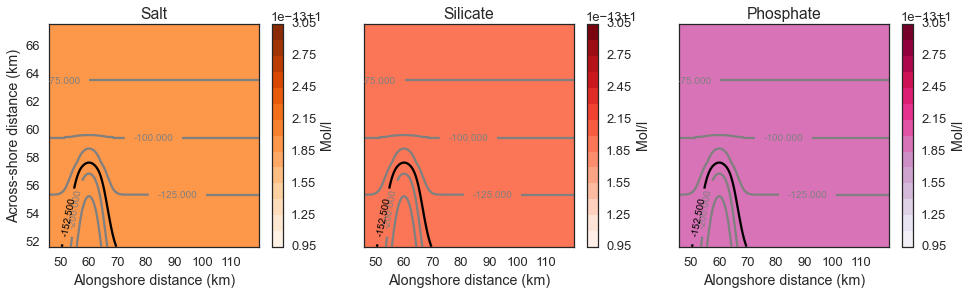

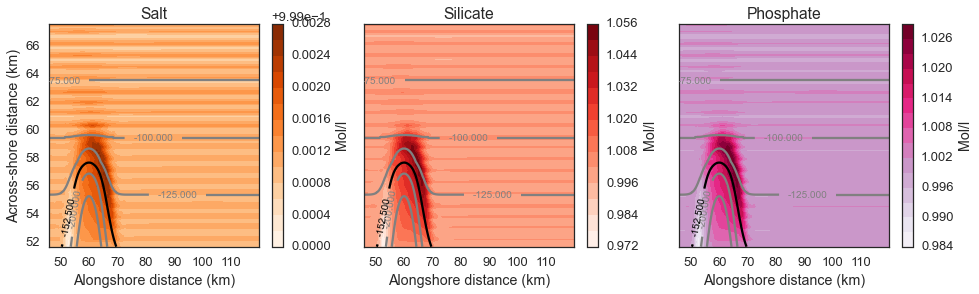

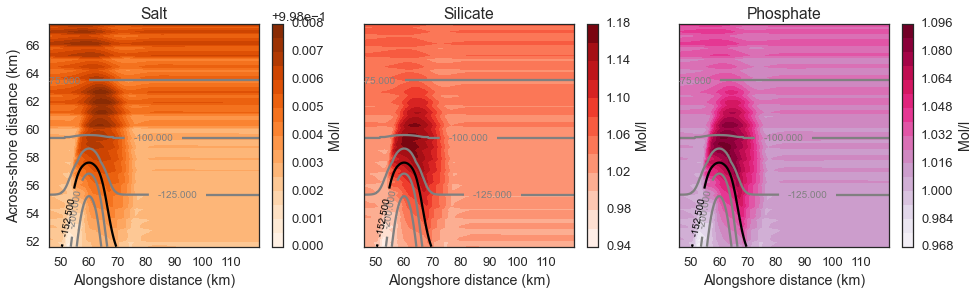

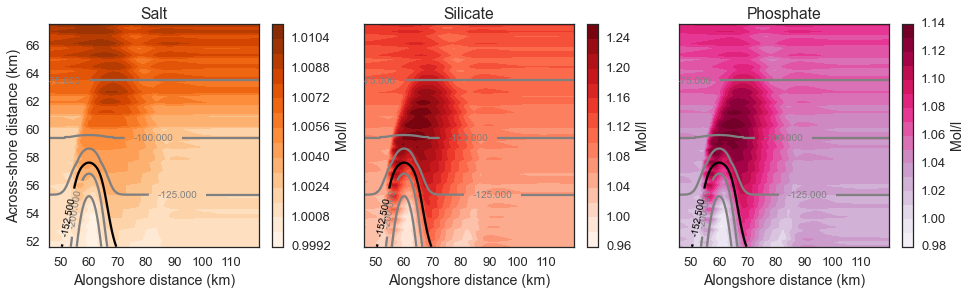

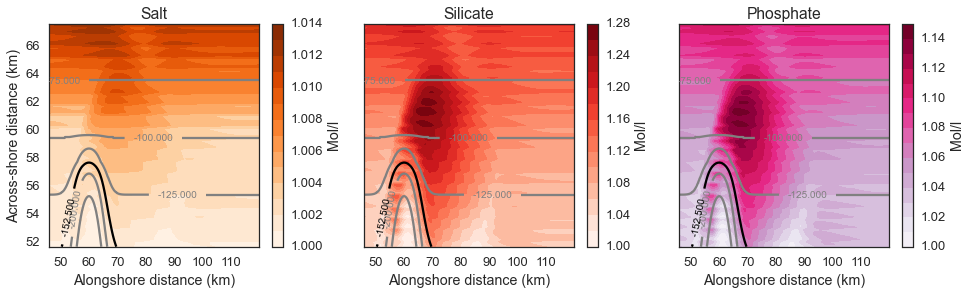

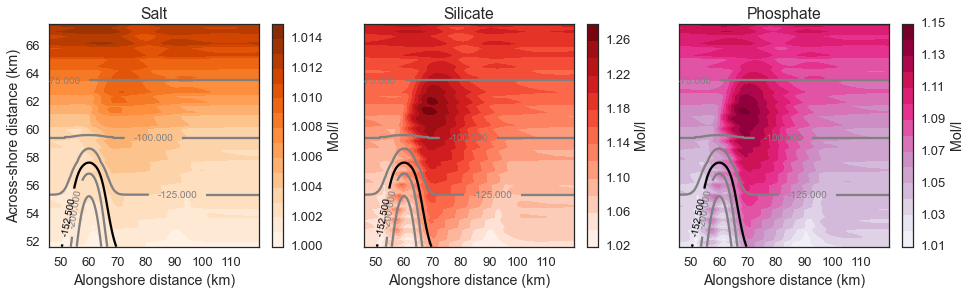

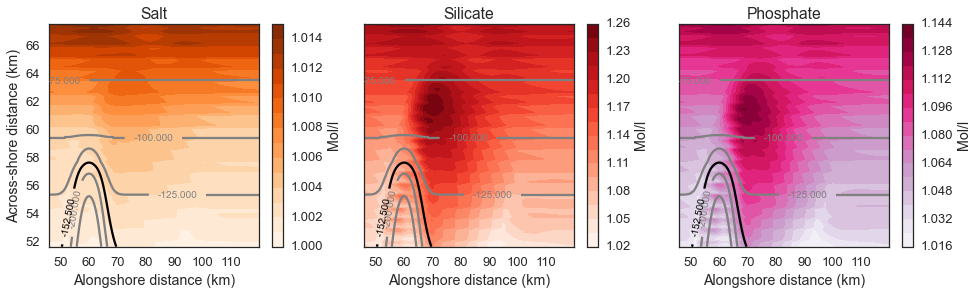

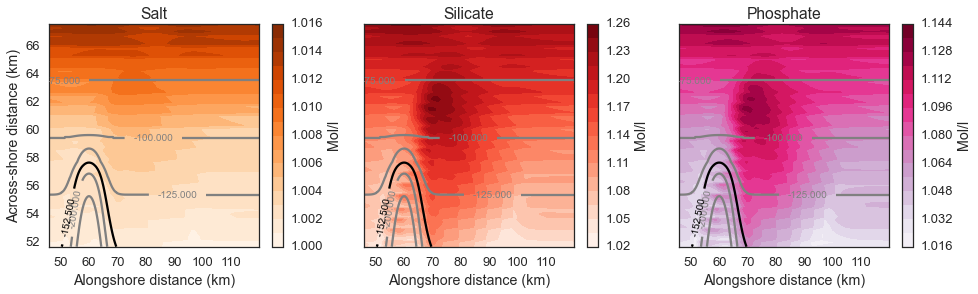

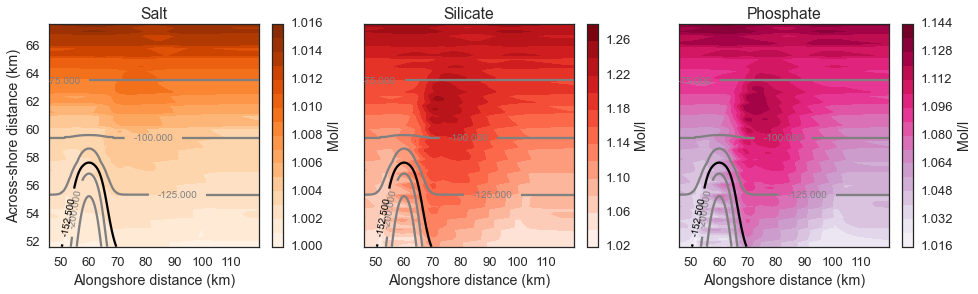

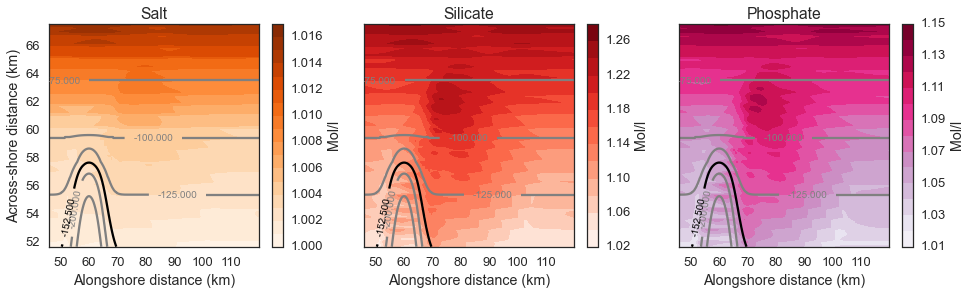

In [46]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    print(tt)
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(16, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                       (Conc2[tt,227:300,100:])/Conc2[0,227:300,100:],15,
                       cmap='Oranges')
    
    cax,kw = mpl.colorbar.make_axes([ax1],location='right',shrink=1)
    cb = plt.colorbar(iso, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax1.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],[-300,-200, rc[30],-125,-100,-75,-50],
                       colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')
    ax1.clabel(cset, inline=1, fontsize=10)
    
    ax1.set_aspect('auto')
    ax1.set_title('Salt')
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso2 = ax2.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc5[tt,227:300,100:])/Conc5[0,227:300,100:],15,cmap='Reds')
    cax,kw = mpl.colorbar.make_axes([ax2],location='right',shrink=1)
    cb = plt.colorbar(iso2, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax2.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50], colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax2.clabel(cset, inline=1, fontsize=10)
    
    ax2.set_aspect('auto')
    ax2.set_title('Silicate')
    ax2.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso3 = ax3.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc6[tt,227:300,100:])/Conc6[0,227:300,100:],
                        15, cmap='PuRd')
    cax,kw = mpl.colorbar.make_axes([ax3],location='right',shrink=1)
    cb = plt.colorbar(iso3, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax3.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax3.clabel(cset, inline=1, fontsize=10)
    
    ax3.set_aspect('auto')
    ax3.set_title('Phosphate' %(tt/2.0))
    ax3.set_xlabel('Alongshore distance (km)')
    
    #plt.tight_layout()
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

0
2
4
6
8
10
12
14
16
18


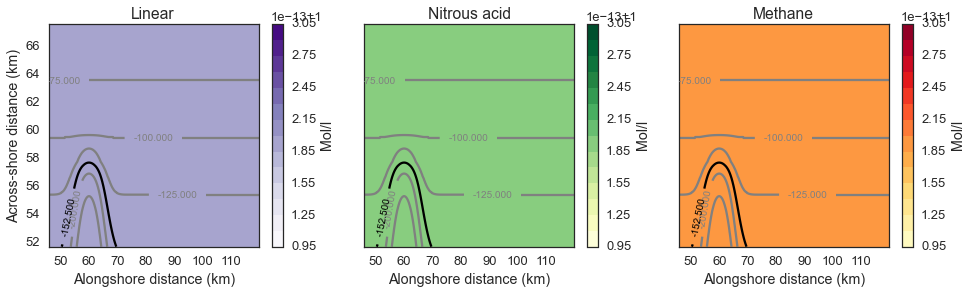

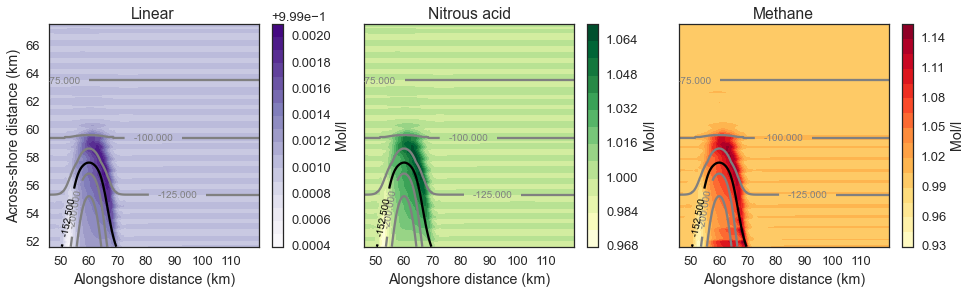

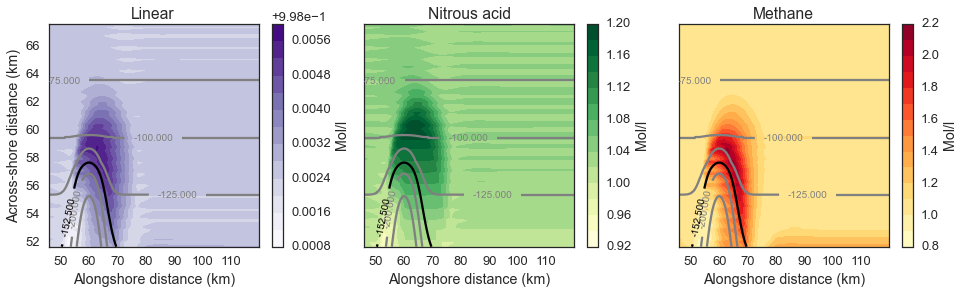

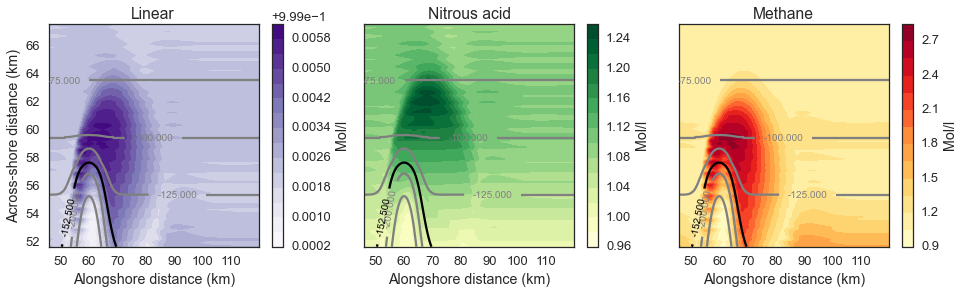

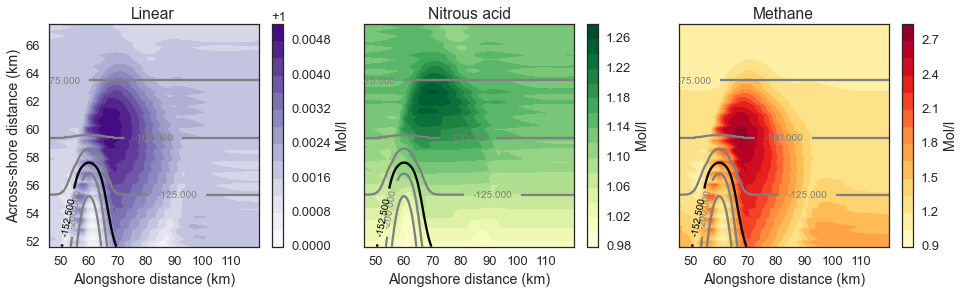

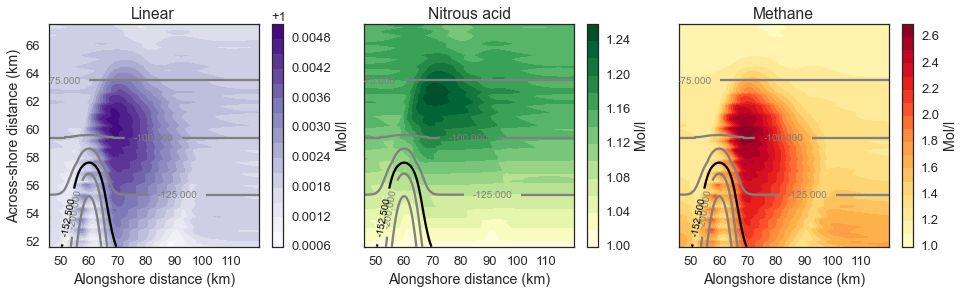

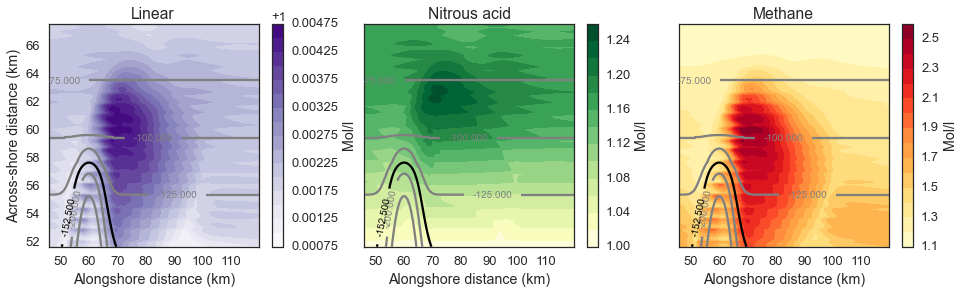

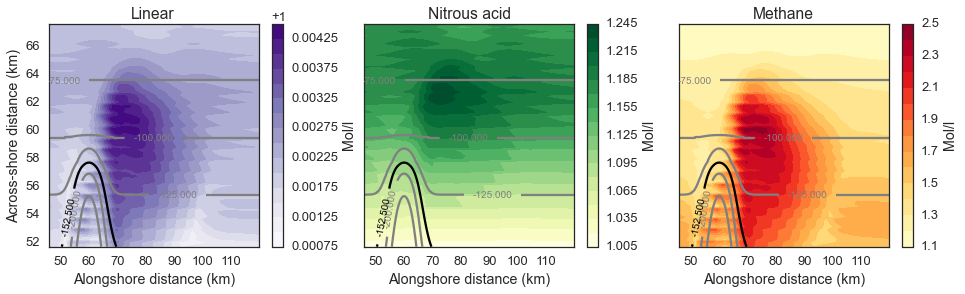

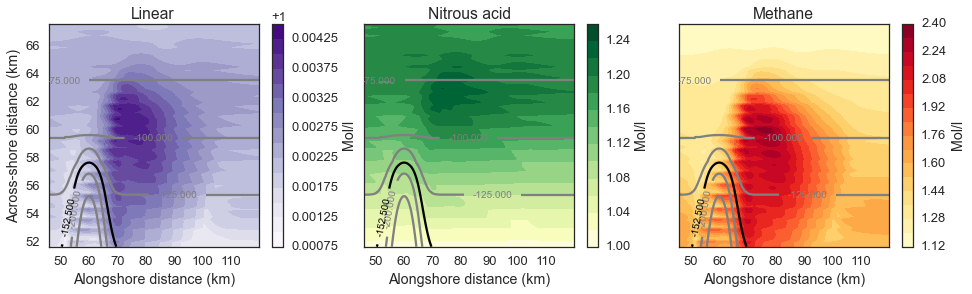

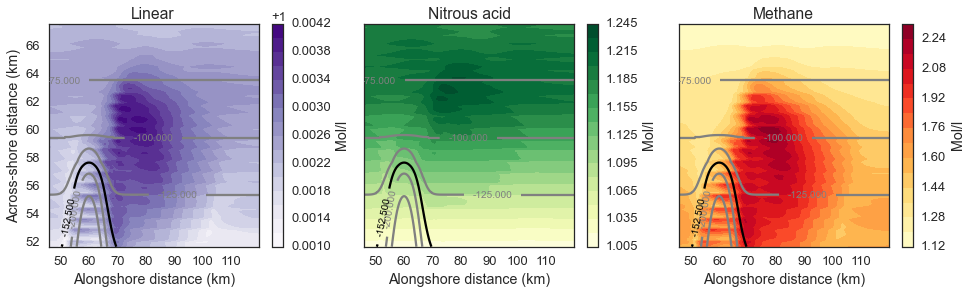

In [47]:
sns.set_context('talk', font_scale=1.0)

for tt in np.arange(0,19,2):
    print(tt)
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(16, 4),  sharey=True, sharex=True)
    
    iso = ax1.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                       (Conc1[tt,227:300,100:])/Conc1[0,227:300,100:],15,
                       cmap='Purples')
    
    cax,kw = mpl.colorbar.make_axes([ax1],location='right',shrink=1)
    cb = plt.colorbar(iso, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax1.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],[-300,-200, rc[30],-125,-100,-75,-50],
                       colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')
    ax1.clabel(cset, inline=1, fontsize=10)
    
    ax1.set_aspect('auto')
    ax1.set_title('Linear')
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso2 = ax2.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc7[tt,227:300,100:])/Conc7[0,227:300,100:],15,cmap='YlGn')
    cax,kw = mpl.colorbar.make_axes([ax2],location='right',shrink=1)
    cb = plt.colorbar(iso2, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax2.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50], colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax2.clabel(cset, inline=1, fontsize=10)
    
    ax2.set_aspect('auto')
    ax2.set_title('Nitrous acid')
    ax2.set_xlabel('Alongshore distance (km)')
    
    #-------------------------------------------------------------------------------------------------------------------
    iso3 = ax3.contourf(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,
                        (Conc8[tt,227:300,100:])/Conc8[0,227:300,100:],
                        15, cmap='YlOrRd')
    cax,kw = mpl.colorbar.make_axes([ax3],location='right',shrink=1)
    cb = plt.colorbar(iso3, cax=cax,**kw)
    cb.set_label('Mol/l')
    
    cset = ax3.contour(xc[227:300,100:]/1000.0,yc[227:300,100:]/1000.0,-bathy[227:300,100:],
                       [-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],
                       linewidth=1, rstride=2, cstride=2,zdir='z')
    ax3.clabel(cset, inline=1, fontsize=10)
    
    ax3.set_aspect('auto')
    ax3.set_title('Methane' %(tt/2.0))
    ax3.set_xlabel('Alongshore distance (km)')
    
    #plt.tight_layout()
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')